## Loading the Data

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Import the data
df = pd.read_csv("palmer_penguins.csv")

#Creating individual dataframe for each of the penguin species
gentoo = df[df.species == "Gentoo"]
adelie = df[df.species == "Adelie"]
chinstrap = df[df.species == "Chinstrap"]

## Observing Seperable Vs. Non-Seperable Data

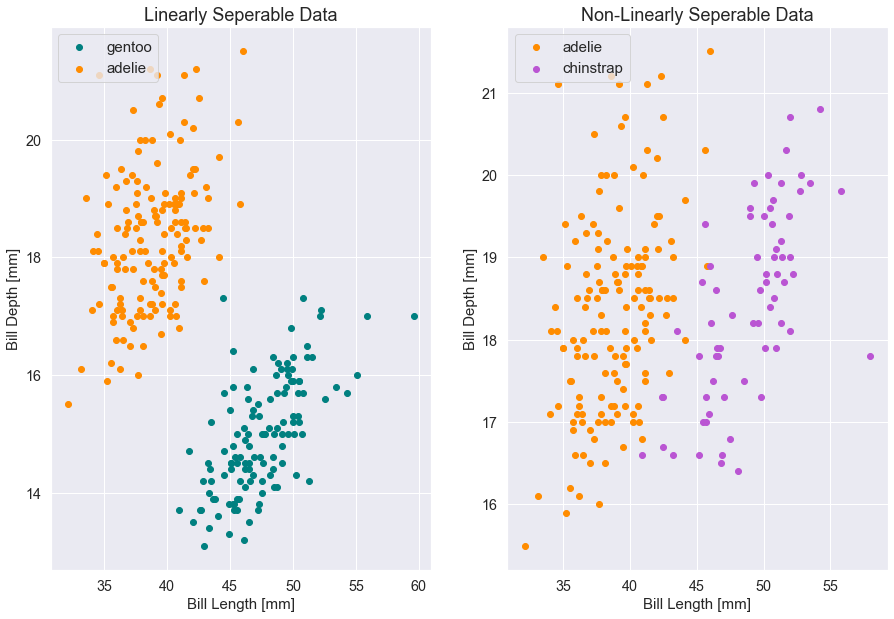

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

# Gentoo Vs. Adelie Scatter
ax1.scatter(gentoo.bill_length_mm, 
            gentoo.bill_depth_mm, 
            color = "teal", 
            label = "gentoo")
ax1.scatter(adelie.bill_length_mm, 
            adelie.bill_depth_mm, 
            color = "darkorange", 
            label = "adelie")
ax1.set_xlabel("Bill Length [mm]", fontsize = 15)
ax1.set_ylabel("Bill Depth [mm]", fontsize = 15)
ax1.legend(fontsize = 15, loc = "upper left")
ax1.set_title("Linearly Seperable Data", fontsize = 18)


# Chinstrap Vs. Adelie Scatter
ax2.scatter(adelie.bill_length_mm, 
            adelie.bill_depth_mm, 
            color = "darkorange", 
            label = "adelie")
ax2.scatter(chinstrap.bill_length_mm, 
            chinstrap.bill_depth_mm, 
            color = "mediumorchid", 
            label = "chinstrap")
ax2.set_xlabel("Bill Length [mm]", fontsize = 15)
ax2.set_ylabel("Bill Depth [mm]", fontsize = 15)
ax2.legend(fontsize = 15, loc = "upper left")
ax2.set_title("Non-Linearly Seperable Data", fontsize = 18)

plt.show()

In [7]:
from sklearn.model_selection import train_test_split

# Creating a datafram containing only Adelie and Chinstrap data points
options = ['Adelie','Chinstrap']
df_AC = df[df['species'].isin(options)]
df_AC = df_AC.dropna()

# Creating a feature matrix using the features bill length and bill depth
X = df_AC[[ "bill_length_mm","bill_depth_mm"]].values 

# Creating vector for target variables 
# Adelie --> -1 or Chinstrap --> 1
y = df_AC.species.values
y = np.where(y=='Adelie',-1,1)

# Splitting into train-test data
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 42)

In [8]:
from sklearn.tree import DecisionTreeClassifier

# Using the sklearn Decision Tree with a depth of 15 and training it with the previously created training data
decision_tree = DecisionTreeClassifier(max_depth=15, random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15, random_state=42)

In [23]:
from sklearn.tree import plot_tree
from sklearn.tree import export_text

# Printing out the decision rules for the decision tree
tree_rules = export_text(decision_tree,
                         feature_names = ["bill length", "bill depth"])
print(tree_rules, "\n")

|--- bill length <= 42.35
|   |--- bill depth <= 16.70
|   |   |--- bill length <= 38.95
|   |   |   |--- class: -1
|   |   |--- bill length >  38.95
|   |   |   |--- class: 1
|   |--- bill depth >  16.70
|   |   |--- class: -1
|--- bill length >  42.35
|   |--- bill length <= 44.65
|   |   |--- bill depth <= 17.65
|   |   |   |--- class: 1
|   |   |--- bill depth >  17.65
|   |   |   |--- bill length <= 43.35
|   |   |   |   |--- class: -1
|   |   |   |--- bill length >  43.35
|   |   |   |   |--- bill length <= 43.80
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- bill length >  43.80
|   |   |   |   |   |--- class: -1
|   |--- bill length >  44.65
|   |   |--- bill depth <= 21.15
|   |   |   |--- bill depth <= 20.15
|   |   |   |   |--- class: 1
|   |   |   |--- bill depth >  20.15
|   |   |   |   |--- bill length <= 48.65
|   |   |   |   |   |--- class: -1
|   |   |   |   |--- bill length >  48.65
|   |   |   |   |   |--- class: 1
|   |   |--- bill depth >  21.15
|   |   |  

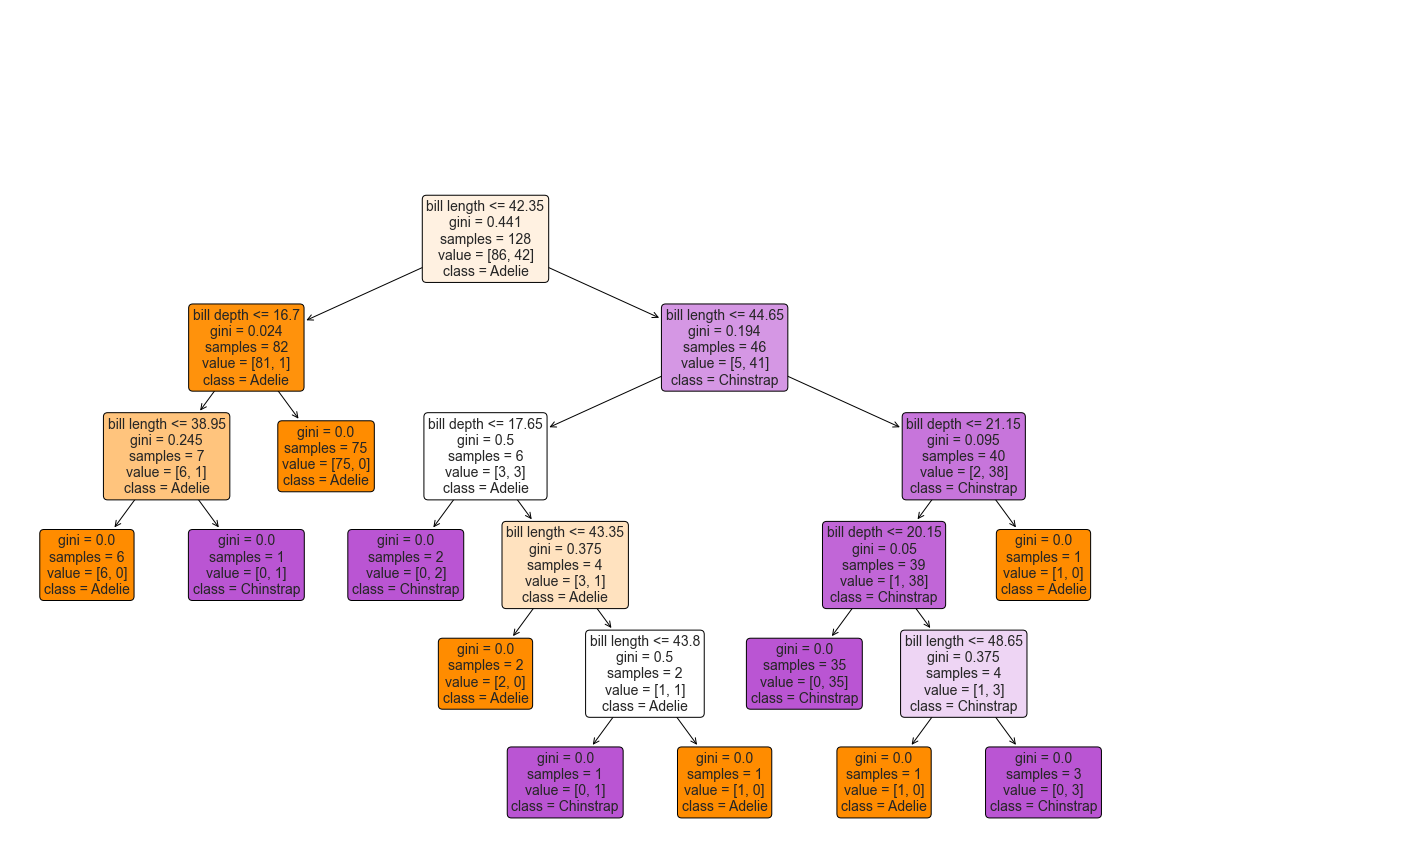

In [50]:
# Visual representation of the decision tree
from matplotlib.colors import ListedColormap, to_rgb

plt.figure(figsize=(20, 12))
colors = ['darkorange', 'mediumorchid']
artists = plot_tree(decision_tree, feature_names=["bill length", "bill depth"], class_names=["Adelie", "Chinstrap"],
                         filled=True, rounded=True, fontsize = 14)
for artist, impurity, value in zip(artists, decision_tree.tree_.impurity, decision_tree.tree_.value):
    # let the max value decide the color; whiten the color depending on impurity (gini)
    r, g, b = to_rgb(colors[np.argmax(value)])
    # for N colors: f = impurity * N/(N-1) if N>1 else 0
    f = impurity * 2 
    artist.get_bbox_patch().set_facecolor((f + (1-f)*r, f + (1-f)*g, f + (1-f)*b))
    artist.get_bbox_patch().set_edgecolor('black')
    # setting arrow width
    arrow = artist.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
       
plt.tight_layout()
plt.show()

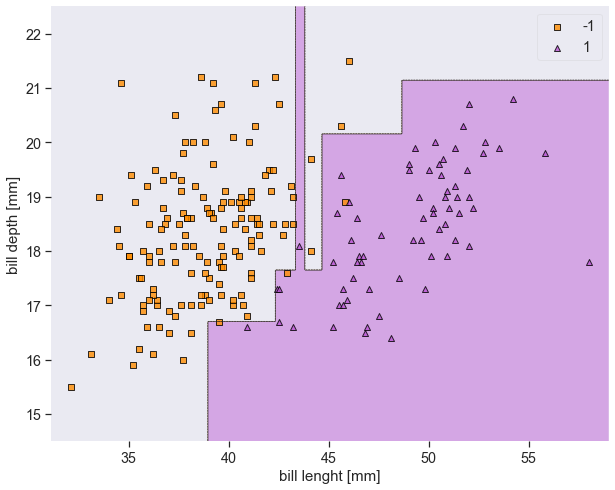

In [18]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
ax = plot_decision_regions(X, y, clf = decision_tree, colors = 'darkorange,mediumorchid')
plt.xlabel("bill lenght [mm]", fontsize = 15)
plt.ylabel("bill depth [mm]", fontsize = 15)
plt.grid()
plt.show()

The decision boundary above does seem to be bordering overfitting. Perhaps, we should lower the depth of the decision tree. As we know, a good litmus test to check for overfitting is to run our learned model on the test data. 

Lets try that.

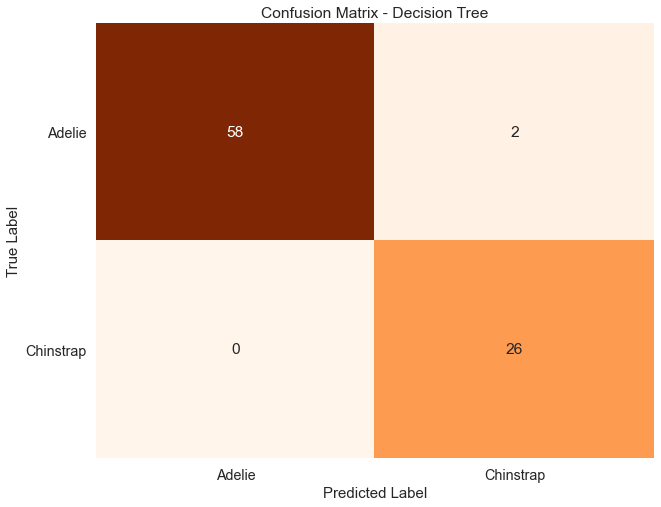

In [26]:
# predicted values on the testing data
test_pred_decision_tree = decision_tree.predict(X_test)

# Import metrics from sklearn 
from sklearn import metrics

# Note: visualizing your tree above will be weird after running seaborn
import seaborn as sns

# The confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, test_pred_decision_tree)

# Convert confusion matrix into dataframe
matrix_df = pd.DataFrame(confusion_matrix)


plt.figure(figsize=(10, 8))
ax = plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df,
            annot = True, 
            fmt = "g",
            ax = ax, 
            cmap="Oranges", 
            cbar = False)

ax.set_title("Confusion Matrix - Decision Tree")
ax.set_xlabel("Predicted Label", fontsize=15)
ax.set_xticklabels(["Adelie", "Chinstrap"])
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(["Adelie", "Chinstrap"], rotation=0)
plt.show()

That seems pretty good. Lets have a look at the classification report.

In [12]:
from sklearn.metrics import classification_report

y_pred = decision_tree.predict(X_test)

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       1.00      0.97      0.98        60
           1       0.93      1.00      0.96        26

    accuracy                           0.98        86
   macro avg       0.96      0.98      0.97        86
weighted avg       0.98      0.98      0.98        86



The classification report also seems to indicate that the model <i> hasn't </i> overfitted. However, in this case I think we should take that with a grain of salt.

If we have a look at our data, there is some degree of intermixing within the data points but not a very high degree. So, our model <i> may </i> have actually overfitted but we might be getting away with it because the data is forgiving.